In [13]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import koreanize_matplotlib 
from wordcloud import WordCloud
from konlpy.tag import Mecab
from collections import Counter
mecab = Mecab()

In [8]:
df = pd.read_csv("./data/fintech_news3.csv")
df

,날짜,제목,원문링크,뉴스본문
0,2025-11-19,"한국핀테크지원센터, ‘제18회 대한민국소통어워즈’에서 2년 연속 3개 부문 대상 수상",https://www.joongang.co.kr/article/25383037,NaN
1,2025-11-19,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,https://fintech.or.kr/web/board/boardContentsV...,"안녕하세요. 핀테크산업협회 사무국입니다.협회는 핀테크 기업과 금융기관, AFA 등 ..."
3,2025-11-19,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요. 한국핀테크지원센터입니다.2025년 금융특화 계층별 AI역량강화 과정 ‘...
4,2025-11-19,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,https://fintech.or.kr/web/board/boardContentsV...,2025년‘핀테크기업 온라인 채용관’ (사람인 saramin) 참여 기업 모집 ...
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제... “몰락 중산층 2000만명 우버 택시로 몰렸다”,https://n.news.naver.com/mnews/article/023/000...,"\n\n[온차이나]중국 민간 경제 전문가들 “통계보다 훨씬 더 나쁘고, 성장시대 ..."
11747,2024-12-16,"""관세 폭탄 때문에 내년엔 더 비싸""…생필품·가전 등 사재기 열풍 부는 美",https://n.news.naver.com/mnews/article/277/000...,"\n\nWSJ ""사재기가 인플레이션 부추길 수도"" 지적미국의 일부 소비자들이 도널드..."
11748,2024-12-16,"구글·메타 등과 AI칩 합작… 브로드컴, 엔비디아 대항마로",https://n.news.naver.com/mnews/article/023/000...,\n\n시총도 1조달러 돌파\n\n\n\n\t\t\t\t\t\t\t\t\t\t미국 ...
11749,2024-12-16,"美, 중국의 중동·동남아 통한 AI 반도체 우회 조달도 막는다",https://n.news.naver.com/mnews/article/023/000...,\n\n수출 물량 상한제 추진\t\t\t\t\t\t\t미국 정부가 국가 안보를 이유...


In [14]:
def text_clean(x):
    # 한글, 영문대소문자, 숫자만 남기고 모두 제거
    cleaned = re.sub(r'[^가-힣a-zA-Z0-9]', " ", x)
    cleaned = cleaned.replace("  ", " ").replace("  ", " ").strip()
    return cleaned

In [15]:
df = df.dropna()
df

,날짜,제목,원문링크,뉴스본문
1,2025-11-19,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,https://fintech.or.kr/web/board/boardContentsV...,"안녕하세요. 핀테크산업협회 사무국입니다.협회는 핀테크 기업과 금융기관, AFA 등 ..."
3,2025-11-19,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요. 한국핀테크지원센터입니다.2025년 금융특화 계층별 AI역량강화 과정 ‘...
4,2025-11-19,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,https://fintech.or.kr/web/board/boardContentsV...,2025년‘핀테크기업 온라인 채용관’ (사람인 saramin) 참여 기업 모집 ...
5,2025-11-19,"금융위, 5대 금융지주 불러모아 “포용금융 적극 역할” 당부",https://n.news.naver.com/mnews/article/016/000...,"\n\n‘포용금융 소통·점검회의’ 개최기관별 지원현황, 준비상황 점검\n\n\n\n..."
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제... “몰락 중산층 2000만명 우버 택시로 몰렸다”,https://n.news.naver.com/mnews/article/023/000...,"\n\n[온차이나]중국 민간 경제 전문가들 “통계보다 훨씬 더 나쁘고, 성장시대 ..."
11747,2024-12-16,"""관세 폭탄 때문에 내년엔 더 비싸""…생필품·가전 등 사재기 열풍 부는 美",https://n.news.naver.com/mnews/article/277/000...,"\n\nWSJ ""사재기가 인플레이션 부추길 수도"" 지적미국의 일부 소비자들이 도널드..."
11748,2024-12-16,"구글·메타 등과 AI칩 합작… 브로드컴, 엔비디아 대항마로",https://n.news.naver.com/mnews/article/023/000...,\n\n시총도 1조달러 돌파\n\n\n\n\t\t\t\t\t\t\t\t\t\t미국 ...
11749,2024-12-16,"美, 중국의 중동·동남아 통한 AI 반도체 우회 조달도 막는다",https://n.news.naver.com/mnews/article/023/000...,\n\n수출 물량 상한제 추진\t\t\t\t\t\t\t미국 정부가 국가 안보를 이유...


In [17]:
df.loc[:, '제목'] = df['제목'].apply(text_clean)

In [18]:
df.loc[:, '뉴스본문'] = df['뉴스본문'].apply(text_clean)

In [19]:
df

,날짜,제목,원문링크,뉴스본문
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...
...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...


In [21]:
df['tokens'] = df['뉴스본문'].apply(mecab.nouns) #알아서 하나씩 들어가서 tokens에 저장됨
df

/tmp/ipykernel_1622/586645683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['뉴스본문'].apply(mecab.nouns) #알아서 하나씩 들어가서 tokens에 저장됨


,날짜,제목,원문링크,뉴스본문,tokens
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...,"[한국, 핀테크, 지원, 센터, 핀테크, 산업, 성장, 기여, 최신, 트렌드, 반영..."
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...,"[안녕, 핀테크, 산업, 협회, 사무국, 협회, 핀테크, 기업, 금융, 기관, 등,..."
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...,"[안녕, 한국, 핀테크, 지원, 센터, 년, 금융, 특화, 계층, 역량, 강화, 과..."
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...,"[년, 핀테크, 기업, 온라인, 용관, 사람, 참여, 기업, 모집, 한국, 핀테크,..."
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...,"[포용, 금융, 소통, 점검, 회의, 개최, 기관, 지원, 현황, 준비, 상황, 점..."
...,...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...,"[온차, 중국, 민간, 경제, 전문가, 통계, 성장, 시대, 경고, 연간, 장률, ..."
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...,"[사재기, 인플레이션, 수, 지적, 미국, 일부, 소비자, 도널드, 트럼프, 미국,..."
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...,"[시, 총, 조, 달러, 돌파, 미국, 반도체, 기업, 브로드컴, 일, 처음, 시가..."
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...,"[수출, 물량, 상한, 추진, 미국, 정부, 국가, 안보, 이유, 특정, 국가, 인..."


In [22]:
df.loc[:, 'tokens'] = df['tokens'].apply(lambda x: [word for word in x if len(word) > 1]) #두글자 이상인 것만 들어오도록
df

,날짜,제목,원문링크,뉴스본문,tokens
1,2025-11-19,한국핀테크지원센터 2025 핀테크 전문가 개발자 과정 FinBoost Academy...,https://fintech.or.kr/web/board/boardContentsV...,한국핀테크지원센터는 핀테크 산업 성장에 기여하고자 최신트렌드를 반영한 교육과정을 기...,"[한국, 핀테크, 지원, 센터, 핀테크, 산업, 성장, 기여, 최신, 트렌드, 반영..."
2,2025-11-19,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 핀테크산업협회 사무국입니다 협회는 핀테크 기업과 금융기관 AFA 등 해외...,"[안녕, 핀테크, 산업, 협회, 사무국, 협회, 핀테크, 기업, 금융, 기관, 해외..."
3,2025-11-19,한국핀테크지원센터 온라인 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생 모집 상시,https://fintech.or.kr/web/board/boardContentsV...,안녕하세요 한국핀테크지원센터입니다 2025년 금융특화 계층별 AI역량강화 과정 핀테...,"[안녕, 한국, 핀테크, 지원, 센터, 금융, 특화, 계층, 역량, 강화, 과정, ..."
4,2025-11-19,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여기업...,https://fintech.or.kr/web/board/boardContentsV...,2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기업 모집 한국핀테크...,"[핀테크, 기업, 온라인, 용관, 사람, 참여, 기업, 모집, 한국, 핀테크, 지원..."
5,2025-11-19,금융위 5대 금융지주 불러모아 포용금융 적극 역할 당부,https://n.news.naver.com/mnews/article/016/000...,포용금융 소통 점검회의 개최기관별 지원현황 준비상황 점검 금융위원회 제공 헤럴드경...,"[포용, 금융, 소통, 점검, 회의, 개최, 기관, 지원, 현황, 준비, 상황, 점..."
...,...,...,...,...,...
11746,2024-12-16,수렁에 빠진 중국 경제 몰락 중산층 2000만명 우버 택시로 몰렸다,https://n.news.naver.com/mnews/article/023/000...,온차이나 중국 민간 경제 전문가들 통계보다 훨씬 더 나쁘고 성장시대 저문다 경고 연...,"[온차, 중국, 민간, 경제, 전문가, 통계, 성장, 시대, 경고, 연간, 장률, ..."
11747,2024-12-16,관세 폭탄 때문에 내년엔 더 비싸 생필품 가전 등 사재기 열풍 부는,https://n.news.naver.com/mnews/article/277/000...,WSJ 사재기가 인플레이션 부추길 수도 지적미국의 일부 소비자들이 도널드 트럼프 미...,"[사재기, 인플레이션, 지적, 미국, 일부, 소비자, 도널드, 트럼프, 미국, 대통..."
11748,2024-12-16,구글 메타 등과 AI칩 합작 브로드컴 엔비디아 대항마로,https://n.news.naver.com/mnews/article/023/000...,시총도 1조달러 돌파 미국 반도체 기업 브로드컴이 13일 처음으로 시가총액 이...,"[달러, 돌파, 미국, 반도체, 기업, 브로드컴, 처음, 시가총액, 달러, 돌파, ..."
11749,2024-12-16,중국의 중동 동남아 통한 AI 반도체 우회 조달도 막는다,https://n.news.naver.com/mnews/article/023/000...,수출 물량 상한제 추진 미국 정부가 국가 안보를 이유로 특정 국가들에 인공지능 A...,"[수출, 물량, 상한, 추진, 미국, 정부, 국가, 안보, 이유, 특정, 국가, 인..."


# 단어 빈도수 체크

In [24]:
all_word_list = []
for row in df['tokens'].tolist():
    all_word_list += row #리스트 안에 있는 모든 요소가 더해져서 하나의 리스트로 나오게됨

In [25]:
all_word_list[:3]

['한국', '핀테크', '지원']

In [26]:
len(all_word_list)

3172234

In [33]:
stopwords = set([
    '은행','어플','뱅킹','앱','서비스','고객',
    '하나','국민','신한','우리','토스','카드','금융','기업','핀테크',
    '한국','지난해','오늘','때문'
])

In [29]:
# full_text에서 명사만 추출
filtered = [word for word in all_word_list if len(word) > 1 and word not in stopwords]

In [30]:
len(filtered)

2934429

In [31]:
filtered[:10]

['지원', '센터', '산업', '성장', '기여', '최신', '트렌드', '반영', '교육', '과정']

In [32]:
word_freq = Counter(filtered)
word_freq

Counter({'대출': 25596,
         '금리': 20487,
         '투자': 20360,
         '시장': 20282,
         '보험': 19701,
         '지원': 19615,
         '자산': 16353,
         '미국': 14866,
         '가능': 12925,
         '상품': 12536,
         '기준': 12202,
         '코인': 10994,
         '뱅크': 10798,
         '결제': 10492,
         '제공': 10319,
         '스테이': 9534,
         '달러': 9349,
         '규제': 9309,
         '기술': 9010,
         '거래': 8977,
         '경우': 8925,
         '사업': 8769,
         '확대': 8720,
         '국내': 8689,
         '평가': 8635,
         '중국': 8620,
         '관리': 8582,
         '디지털': 8458,
         '필요': 8375,
         '관련': 8259,
         '규모': 8192,
         '올해': 8185,
         '증가': 8121,
         '수익': 8077,
         '당국': 7835,
         '자금': 7808,
         '정책': 7776,
         '증권': 7741,
         '정부': 7579,
         '이상': 7511,
         '제도': 7503,
         '신용': 7477,
         '대상': 7454,
         '최근': 7357,
         '신청': 7291,
         '강화': 7237,
         '정보': 71

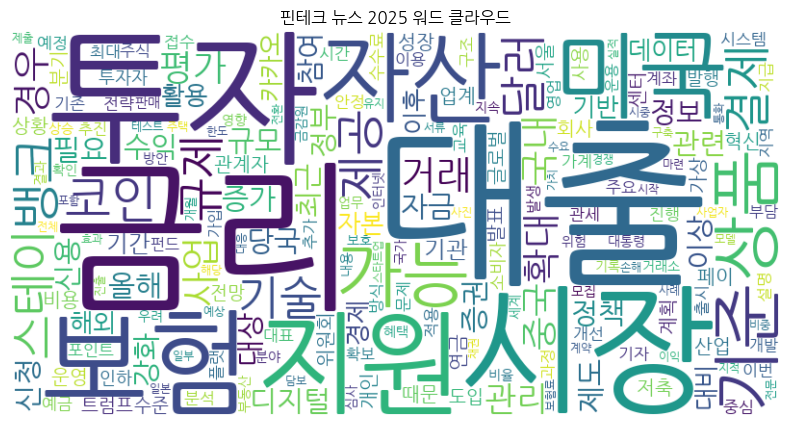

In [34]:
wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("핀테크 뉴스 2025 워드 클라우드")
plt.show()

# WordVec2, LDA 토픽 모델링, T-SNE 시각화

In [36]:
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

In [ ]:
def find_optimal_topics(texts, start=2, end=8):
    # texts는 문자열 리스트
    tokenized_texts = tokenize_texts(texts)
    if not tokenized_texts:
        return start
    # gensim으로 BoW(숫자로 인코딩 된 단어 모음)
    dictionary = corpora.Dictionary(tokenized_texts)
    vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
    
    try:
        doc_term_matrix = vectorizer.fit_transform(tokenized_texts)
    except:
        print("벡터화중 오류발생, 기본 토픽 수 2개 반환")
        return start
    
    best_score = -1
    best_n = start
    
    # LDA 분석
    for n_topics in range(start, end+1):
        lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(doc_term_matrix)
        
        feature_names = vectorizer.get_feature_names_out()
        # 상위 10개의 단어를 순서대로 추출
        topics = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in lda_model.components_]
        
        # 응집도 계산
        cm = CoherenceModel(topics=topics, texts=tokenized_texts, dictionary=dictionary, coherence="c_v")
        score = cm.get_coherence()
        print(f"토픽수: {n_topics}, Coherence Score: {score:.4f}")
        
        if score > best_score:
            best_score = score
            best_n = n_topics
    
    print(f"최적 토픽수: {best_n} (Score: {best_score:.4f})")
    return best_n

In [ ]:
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=2, workers=8, sg=1)

In [ ]:
def topic.modeling(tokenized.text31,dhepdddddk)
    for senti in pn:
        df = pn[senti]['사용자리뷰']
    
        # 리뷰 수 체크 20개 초과
        if len(df) < 20:
            print(f"{bank_eng} 리뷰수 부족 ({len(df)}개) - 스킵")
            continue

        texts = df.tolist()

        try;
            vectorizer = CountVectorizer(max_df=0.9, min_df=10)
            review_vec = vectorizer.fit_transform(df)

        if tsne_perplexity < 2:
            tsne_perplexity = 2

        tsne = TSNE(n_components=2, random_state=42, perplexity=tsne_perplexity)
        reduced_vecs = tsne. fit_transform(vectors)

        # tsne 시각화

        plt.figure(figsize=(10, 6))
        for i, word in enumerate(valid_words):
            x, y = reduced_vecs [i]
            plt.scatter(x, y)
            plt.text(x + 0.01, y +0.01, word, fontsize=12)
            plt.title(f"wn핀테크 뉴스 2025 {month}월 토픽 단어의 Word2Vec 유사도 기반 시각화 (T-SNE)")
            plt.grid(True)
            plt.show()
            except Exception as e:
            print(e)


In [39]:
df['날짜'] = pd.to_datetime(df['날짜'])

/tmp/ipykernel_1622/2071769210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['날짜'] = pd.to_datetime(df['날짜'])


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11686 entries, 1 to 11750
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      11686 non-null  datetime64[ns]
 1   제목      11686 non-null  object        
 2   원문링크    11686 non-null  object        
 3   뉴스본문    11686 non-null  object        
 4   tokens  11686 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 547.8+ KB


In [43]:
for month in range(1,12):
    topic_modeling(df.loc[(df['날짜'].dt.month == month), 'tokens'], w2v_model, month)

NameError: name 'topic_modeling' is not defined

In [45]:
#!pip install python-dotenv
#!pip install google-genai

In [51]:
import os
from dotenv import load_dotenv
load_dotenv("./.env_gemini")
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')

In [52]:
from google import genai

In [54]:
# The client gets the API key from the environment variable `GEMINI_API_KEY`.
client = genai.Client(api_key=GEMINI_API_KEY)

response = client.models.generate_content(
    model="gemini-2.5-flash", contents="핀테크에 대해서 알려줘"
)
print(response.text)

## 핀테크(Fintech)에 대해 알려드립니다.

**핀테크(Fintech)**는 **Finance(금융)**와 **Technology(기술)**의 합성어로, 정보통신기술(ICT)을 활용하여 기존 금융 서비스의 전달 방식을 혁신하고 효율성을 높이는 모든 형태의 기술 기반 금융 서비스를 통칭합니다.

쉽게 말해, **"기술로 금융을 더 편리하고, 저렴하고, 빠르고, 똑똑하게 만드는 것"** 이라고 할 수 있습니다.

---

### 핀테크의 등장 배경 및 주요 특징

**1. 등장 배경:**
*   **기술 발전:** 인터넷, 스마트폰, 빅데이터, 인공지능, 블록체인 등 ICT 기술의 급격한 발전.
*   **소비자 니즈 변화:** 디지털 환경에 익숙한 세대의 등장과 함께 더 빠르고, 편리하며, 개인화된 금융 서비스에 대한 요구 증대.
*   **기존 금융의 한계:** 복잡한 절차, 높은 수수료, 영업시간 제한 등 기존 금융 서비스의 비효율성.
*   **규제 완화 및 혁신 촉진:** 각국 정부의 핀테크 산업 육성 정책.

**2. 주요 특징:**
*   **편의성:** 스마트폰 앱 등을 통해 언제 어디서든 금융 서비스를 이용 가능.
*   **접근성:** 금융 소외 계층에게도 저렴하고 쉽게 금융 서비스를 제공.
*   **효율성/속도:** 자동화된 시스템으로 처리 속도 향상 및 비용 절감.
*   **개인화:** 빅데이터 분석을 통해 개인의 니즈에 맞춘 맞춤형 서비스 제공.
*   **낮은 수수료:** 물리적 지점 운영 비용 감소 등으로 수수료 절감.

---

### 핀테크의 주요 분야와 예시

핀테크는 매우 광범위한 분야를 포괄하며, 일상생활에서 이미 많이 활용되고 있습니다.

1.  **간편 결제 및 송금:**
    *   **설명:** 모바일 앱이나 웹을 통해 쉽고 빠르게 결제하거나 돈을 보내는 서비스.
    *   **예시:** 카카오페이, 네이버페이, Toss (토스), 삼성페이, 애플페이, PayPal, Revolut 등.

2.  **디지털

# 핀테크 뉴스 제목을 분기별로 gemini에게 요약시키고 아이디어 물어보기

In [58]:
titles = " ".join(df.loc[(df['날짜'].dt.month >= 1) & (df['날짜'].dt.month <= 3) '제목'].tolist())

SyntaxError: invalid syntax. Perhaps you forgot a comma? (507346734.py, line 1)

In [ ]:
분기별로 모아서 분석했던 결과야. 이 모든 내용을 다시 종합해서 주요 이슈를 분석하고, 그 내용을 토대로 새로운 핀테크 서비스를 기획할 때 사용할 수 있을만한 아이디어 10개 제시해줘, 그리고 웹을 검색해서 새로운 아이디어를 이미 서비스로 개발해서 출시한 앱이나 사이트가 있으면 그곳의 링크 제시해줘. 이 모든 내용을 마크다운 표 코드로 정리되도록 해줘